In [459]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [460]:
# Reading data in dataframe

housing_df = pd.read_csv('train.csv')

housing_df.shape

(1460, 81)

In [461]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [462]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

As per the given data dictionary if a feature is not there in a house, the corresponding columns have NA filled. It represents missing feature in the house, and not the missing data itself. E.g. if there is no basement, then columns such as BsmtQual, BsmtCond etc, are filled with NA.

We will first impute values in these columns

In [463]:
# Imputing values for Basement, Garage, etc specific features
housing_df['BsmtQual'].fillna('Not Applicable', inplace=True)
housing_df['BsmtCond'].fillna('Not Applicable', inplace=True)
housing_df['BsmtExposure'].fillna('Not Applicable', inplace=True)
housing_df['BsmtFinType1'].fillna('Not Applicable', inplace=True)
housing_df['BsmtFinType2'].fillna('Not Applicable', inplace=True)

housing_df['GarageType'].fillna('Not Applicable', inplace=True)
housing_df['GarageFinish'].fillna('Not Applicable', inplace=True)
housing_df['GarageQual'].fillna('Not Applicable', inplace=True)
housing_df['GarageCond'].fillna('Not Applicable', inplace=True)
housing_df['GarageYrBlt'].fillna(0, inplace=True)

housing_df['MasVnrType'].fillna('Not Applicable', inplace=True)
housing_df['FireplaceQu'].fillna('Not Applicable', inplace=True)

In [464]:
# Method to list null values

def getNullValues(data_df):
    col_list = list(data_df)
    null_count = []
    for i in data_df.isnull().sum()*100/data_df.shape[0]:
        null_count.append(i)
    row_val = {'Column': col_list, 
               'Null_Count': null_count}
    null_df = pd.DataFrame(row_val)
    return null_df


# Now we will check null values in the given dataset

tmp_df = getNullValues(housing_df)
tmp_df[tmp_df['Null_Count'] != 0].sort_values(by='Null_Count', ascending = False)

Column  Null_Count
72       PoolQC   99.520548
74  MiscFeature   96.301370
6         Alley   93.767123
73        Fence   80.753425
3   LotFrontage   17.739726
26   MasVnrArea    0.547945
42   Electrical    0.068493

In [465]:
# Let's delete the columns with high number of Null_Count

housing_df = housing_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)


In [466]:
# Deleting ID column as it is just a placeholder
housing_df = housing_df.drop(['Id'],axis=1)

### Outlier Identification

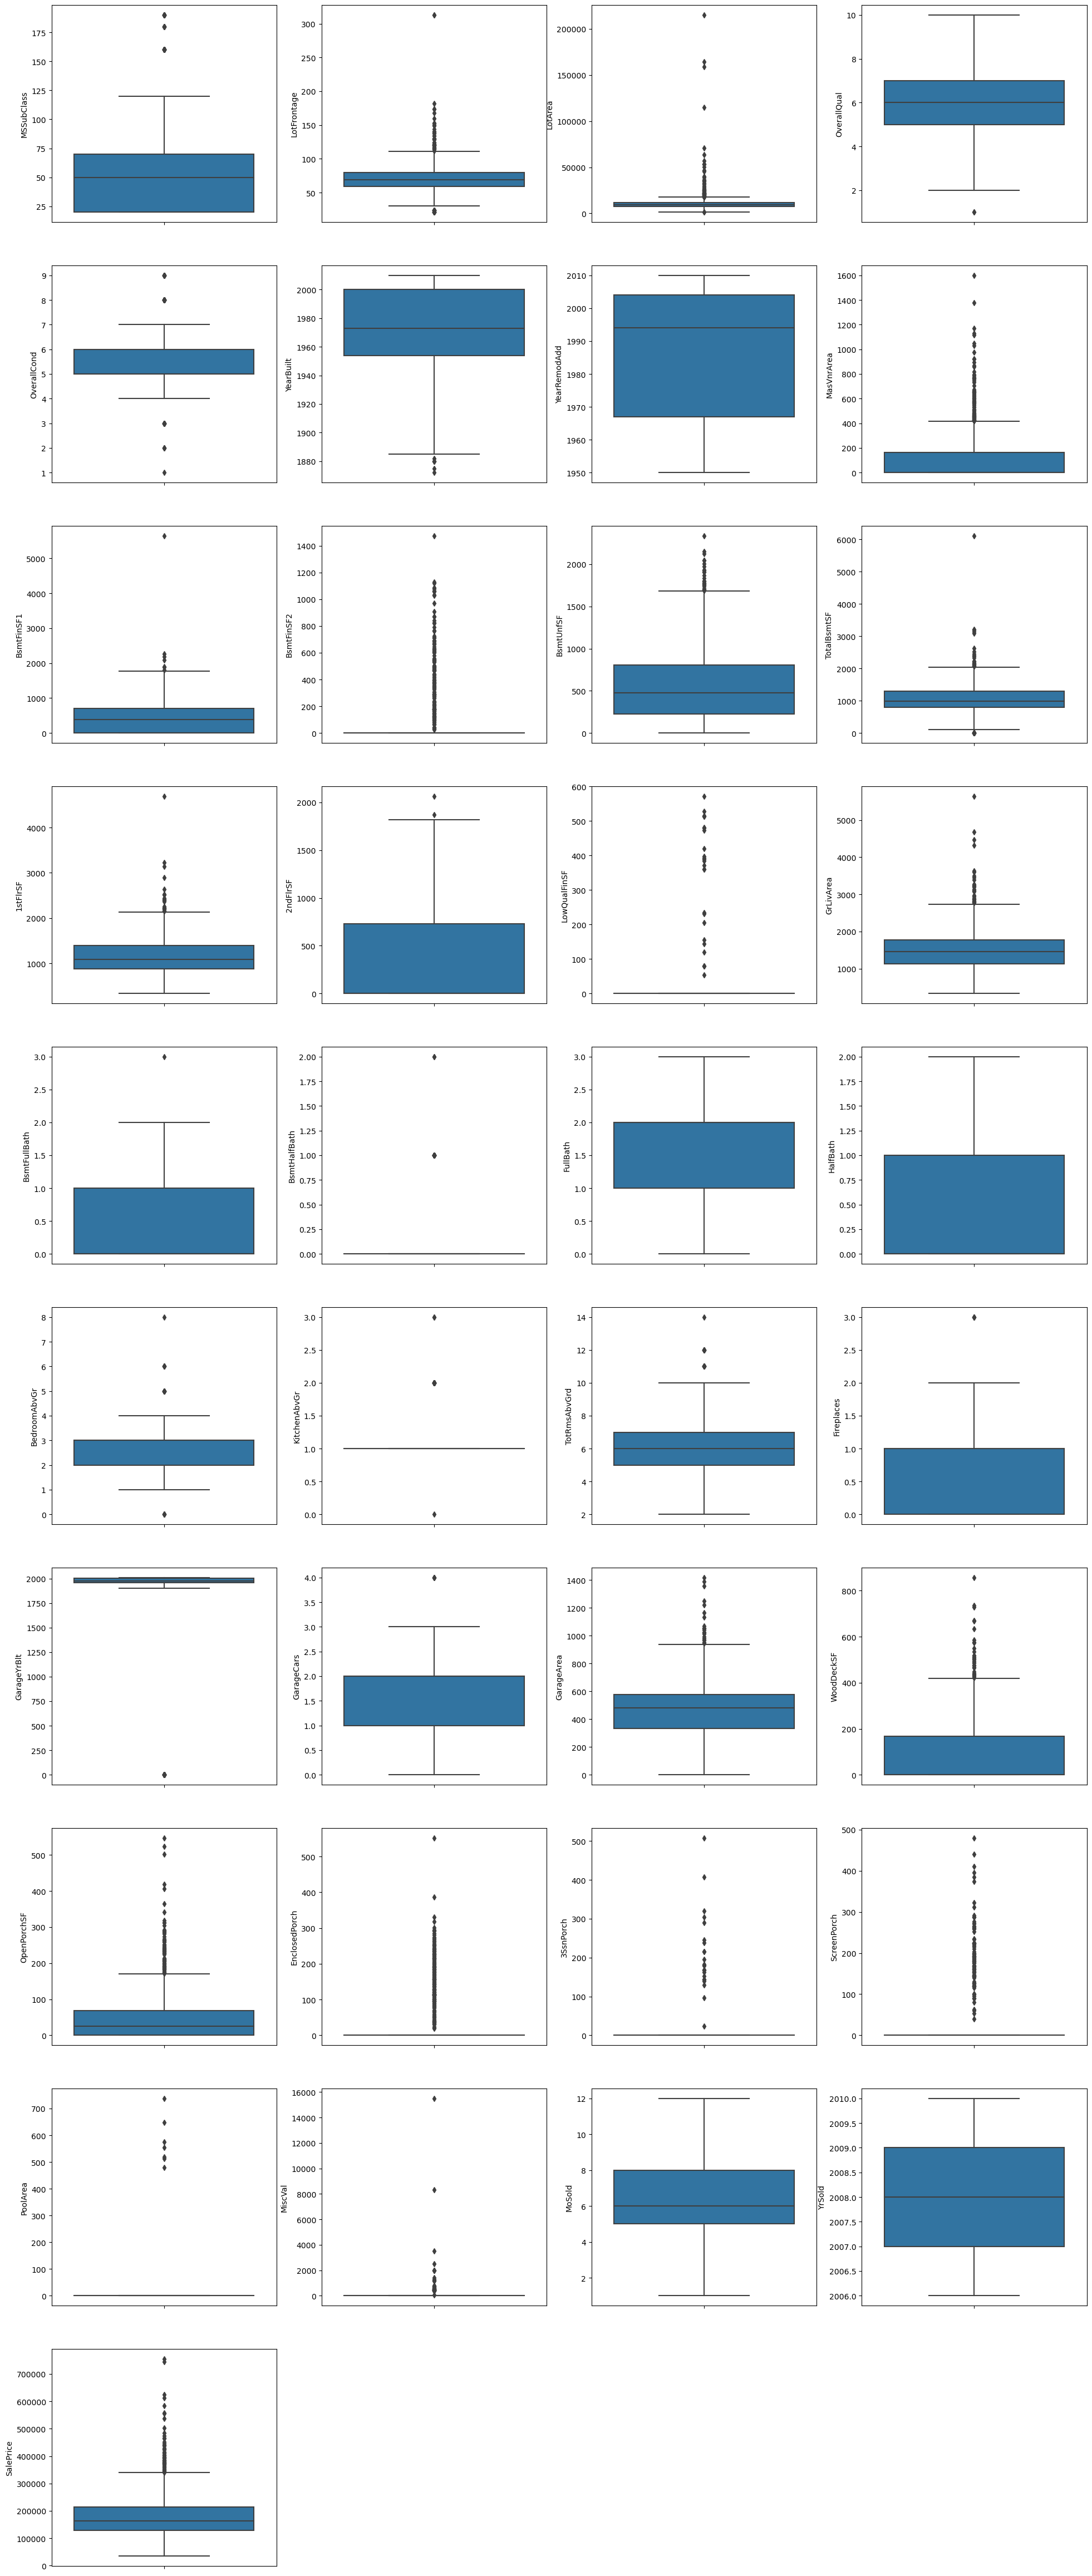

In [467]:
# Method for generating box plots

def generateBoxPlots(columns_data):
    plot_rows = int(columns_data.size / 3) + 1
    plt.figure(figsize=(24, 6 * plot_rows))
    i = 1
    for num_col in columns_data:
        plt.subplot(plot_rows, 4, i)
        sns.boxplot(y=num_col, data=housing_df)
        i += 1

# Get all the numerical columns
numerical_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns
generateBoxPlots(numerical_cols)

#### There are outliers in multiple columns. Let's fix them

In [468]:
outlier_percentage = {}
for col in numerical_cols:
    IQR = housing_df[col].quantile(.75) - housing_df[col].quantile(.25)
    outlier_count = housing_df[(housing_df[col] > (housing_df[col].quantile(.75)+1.5*IQR)) | (housing_df[col]<(housing_df[col].quantile(.25)-1.5*IQR))].shape[0]
    outlier_percentage[col]=round(outlier_count/housing_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Feature':list(outlier_percentage.keys()),'Percentage':list(outlier_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Feature  Percentage
29  EnclosedPorch       14.25
9      BsmtFinSF2       11.44
4     OverallCond        8.56
31    ScreenPorch        7.95
0      MSSubClass        7.05
7      MasVnrArea        6.58
1     LotFrontage        6.03
17   BsmtHalfBath        5.62
24    GarageYrBlt        5.55
28    OpenPorchSF        5.27
2         LotArea        4.73
21   KitchenAbvGr        4.66
36      SalePrice        4.18
11    TotalBsmtSF        4.18
33        MiscVal        3.56
20   BedroomAbvGr        2.40
27     WoodDeckSF        2.19
15      GrLivArea        2.12
22   TotRmsAbvGrd        2.05
10      BsmtUnfSF        1.99
14   LowQualFinSF        1.78
30      3SsnPorch        1.64
26     GarageArea        1.44
12       1stFlrSF        1.37
5       YearBuilt        0.48
8      BsmtFinSF1        0.48
32       PoolArea        0.48
23     Fireplaces        0.34
25     GarageCars        0.34
3     OverallQual        0.14
13       2ndFlrSF        0.14
16   BsmtFullBath        0.07
6    YearRemodAdd        0.00
19       HalfBath        0.00
34         MoSold        0.00
35         YrSold        0.00
18       FullBath        0.00

In [469]:
for Feature, Percentage in outlier_percentage.items():
    if Feature!='SalePrice':
        IQR = housing_df[Feature].quantile(.75) - housing_df[Feature].quantile(.25) 
        min_value = housing_df[Feature].quantile(.25)-1.5*IQR
        max_value = housing_df[Feature].quantile(.75)+1.5*IQR
        housing_df[Feature][housing_df[Feature] > max_value] = max_value
        housing_df[Feature][housing_df[Feature] < min_value ] = min_value

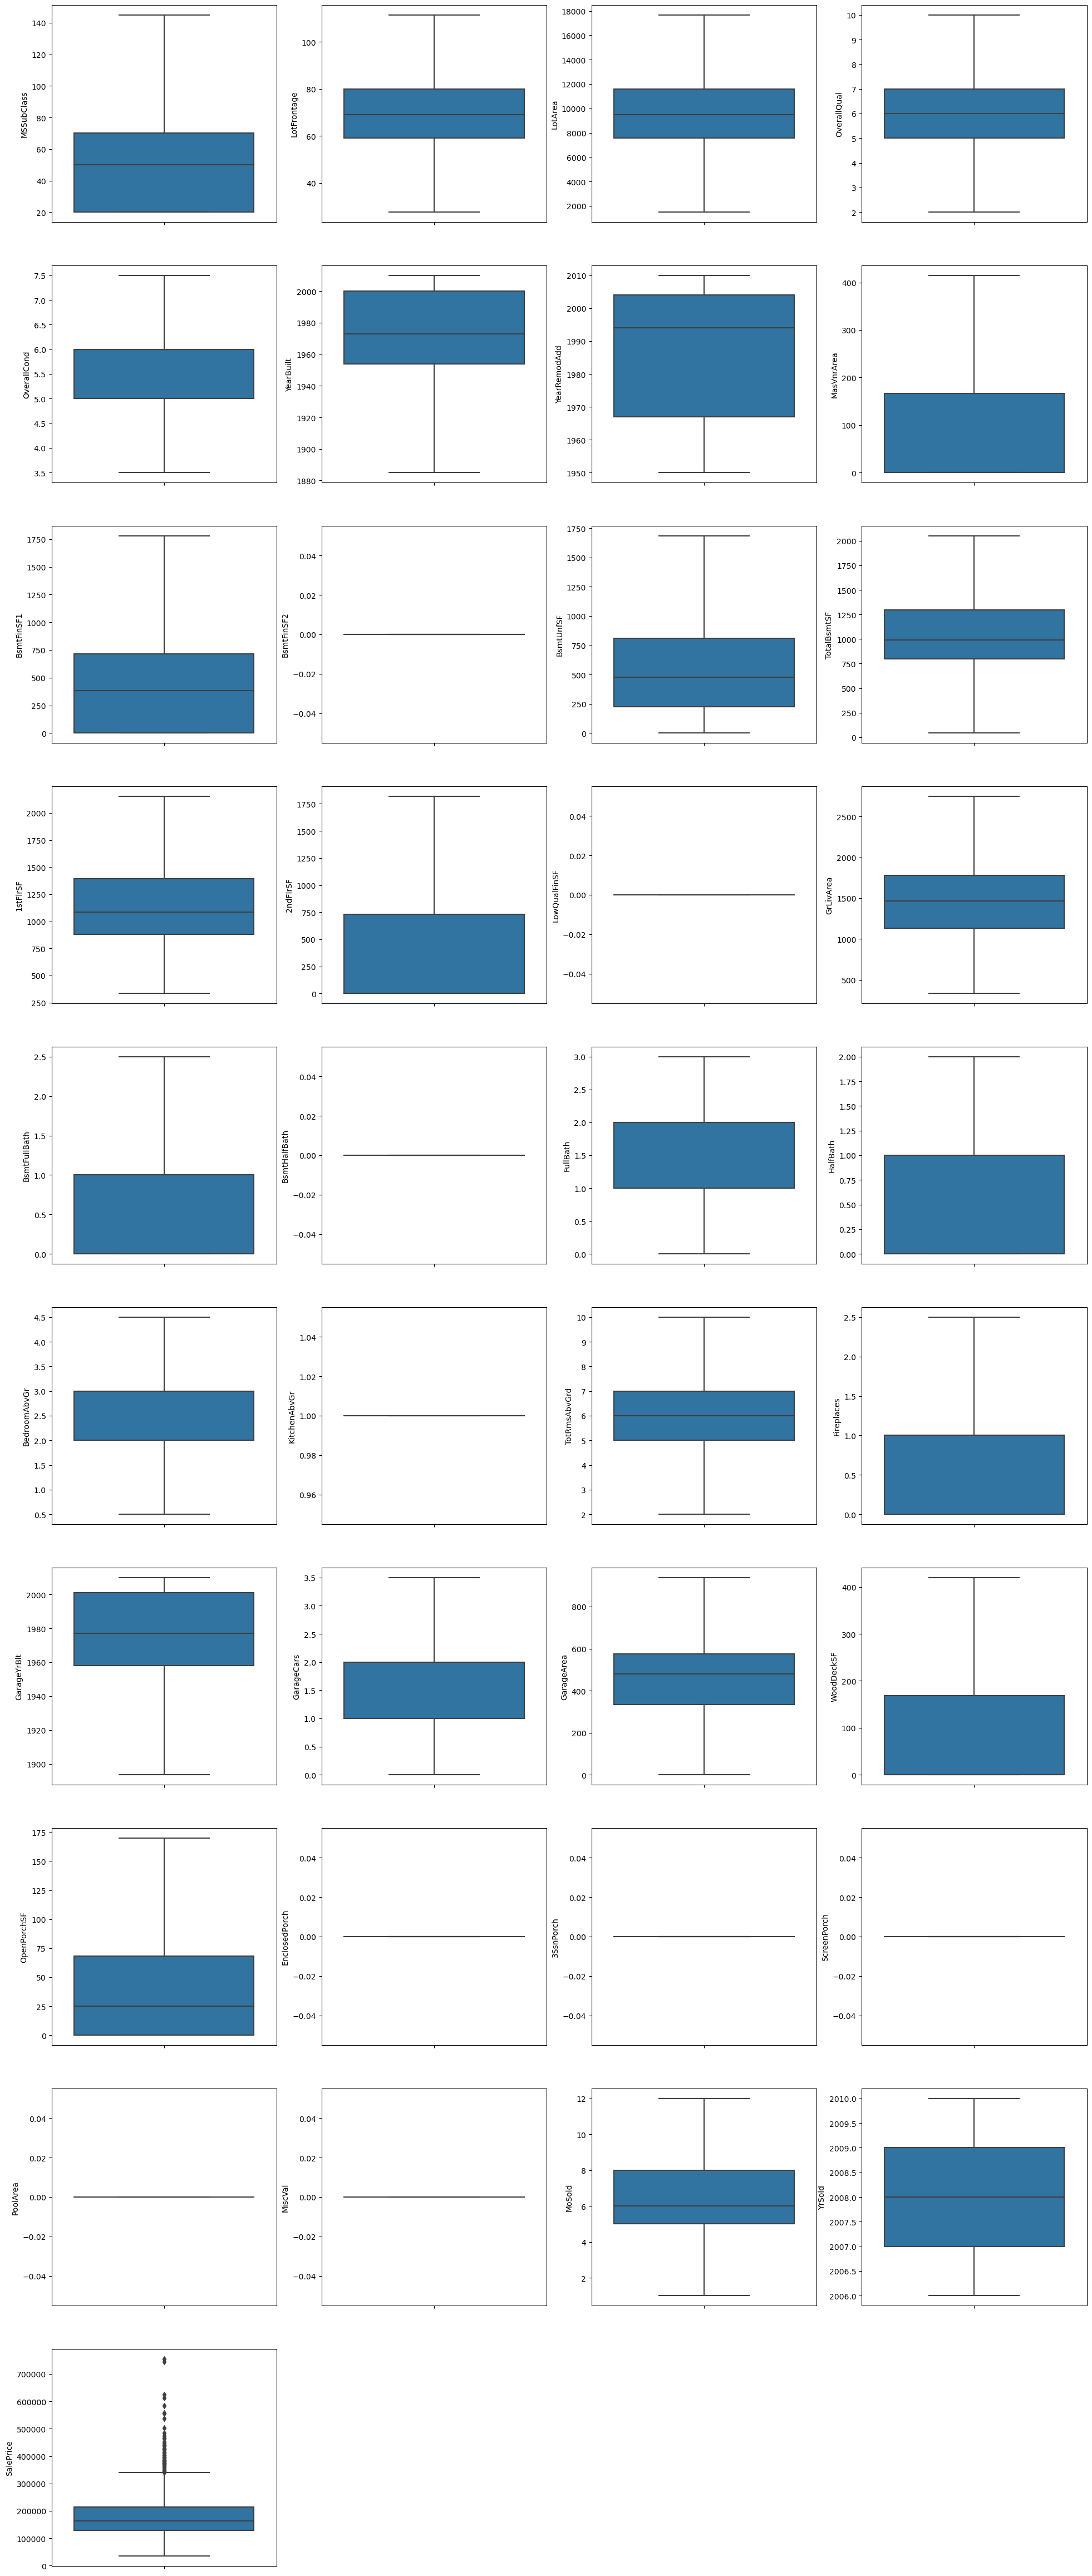

In [470]:
numerical_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns
generateBoxPlots(numerical_cols)

#### From the above output it is clear that the outlier problem has been solved. It also appears that some columns have not many unique values.

### Deleting Unique values

In [471]:
for col in ['MiscVal', 'BsmtFinSF2', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', 'BsmtHalfBath']:
    print(housing_df[col].value_counts())

MiscVal
0    1460
Name: count, dtype: int64
BsmtFinSF2
0    1460
Name: count, dtype: int64
3SsnPorch
0    1460
Name: count, dtype: int64
ScreenPorch
0    1460
Name: count, dtype: int64
PoolArea
0    1460
Name: count, dtype: int64
LowQualFinSF
0    1460
Name: count, dtype: int64
KitchenAbvGr
1    1460
Name: count, dtype: int64
EnclosedPorch
0    1460
Name: count, dtype: int64
BsmtHalfBath
0    1460
Name: count, dtype: int64


In [472]:
# From the output above it is clear that these columns can be dropped
housing_df.drop(['MiscVal', 'BsmtFinSF2', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', 'BsmtHalfBath'], axis = 1, inplace = True)

In [473]:
# Checking the shape after columns drop
housing_df.shape

(1460, 67)

### Preparing Categorical Data for EDA & Model building

In [474]:
# Replacing coded data with numerical equivalents
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not Applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not Applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not Applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not Applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [475]:
# Check columns after encoding. Verify that all columns have numeric type and there are 0 null values.
housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 
              'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC','CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond',
             'Functional', 'FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1460 non-null   int64
 1   Utilities     1460 non-null   int64
 2   LandSlope     1460 non-null   int64
 3   HouseStyle    1460 non-null   int64
 4   ExterQual     1460 non-null   int64
 5   ExterCond     1460 non-null   int64
 6   BsmtQual      1460 non-null   int64
 7   BsmtCond      1460 non-null   int64
 8   BsmtExposure  1460 non-null   int64
 9   BsmtFinType1  1460 non-null   int64
 10  BsmtFinType2  1460 non-null   int64
 11  HeatingQC     1460 non-null   int64
 12  CentralAir    1460 non-null   int64
 13  KitchenQual   1460 non-null   int64
 14  GarageFinish  1460 non-null   int64
 15  GarageQual    1460 non-null   int64
 16  GarageCond    1460 non-null   int64
 17  Functional    1460 non-null   int64
 18  FireplaceQu   1460 non-null   int64
dtypes: int64(19)
memory usage: 

In [476]:
# Checking for null values after encoding

tmp_df = getNullValues(housing_df)
tmp_df[tmp_df['Null_Count'] != 0].sort_values(by='Null_Count', ascending = False)

Column  Null_Count
2   LotFrontage   17.739726
24   MasVnrArea    0.547945
39   Electrical    0.068493

In [477]:
# There still are some null values in a few columns. Let's impute the values there
median_value = housing_df.LotFrontage.median()
housing_df.LotFrontage.fillna(median_value, inplace=True)

median_value = housing_df.MasVnrArea.median()
housing_df.MasVnrArea.fillna(median_value, inplace=True)

housing_df.Electrical.fillna(housing_df.Electrical.mode()[0], inplace=True)

In [478]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [479]:
#### Computing House Age

housing_df['CurrentYear'] = datetime.datetime.now().year
housing_df["HouseAge"] = housing_df['CurrentYear'] - housing_df['YearBuilt']
housing_df.drop(['CurrentYear', 'YearBuilt', 'YrSold'], axis = 1, inplace = True)

In [480]:
housing_df.shape

(1460, 66)

### Univariate and Bivariate Analysis

#### Drawing Heatmap and plotting correlation



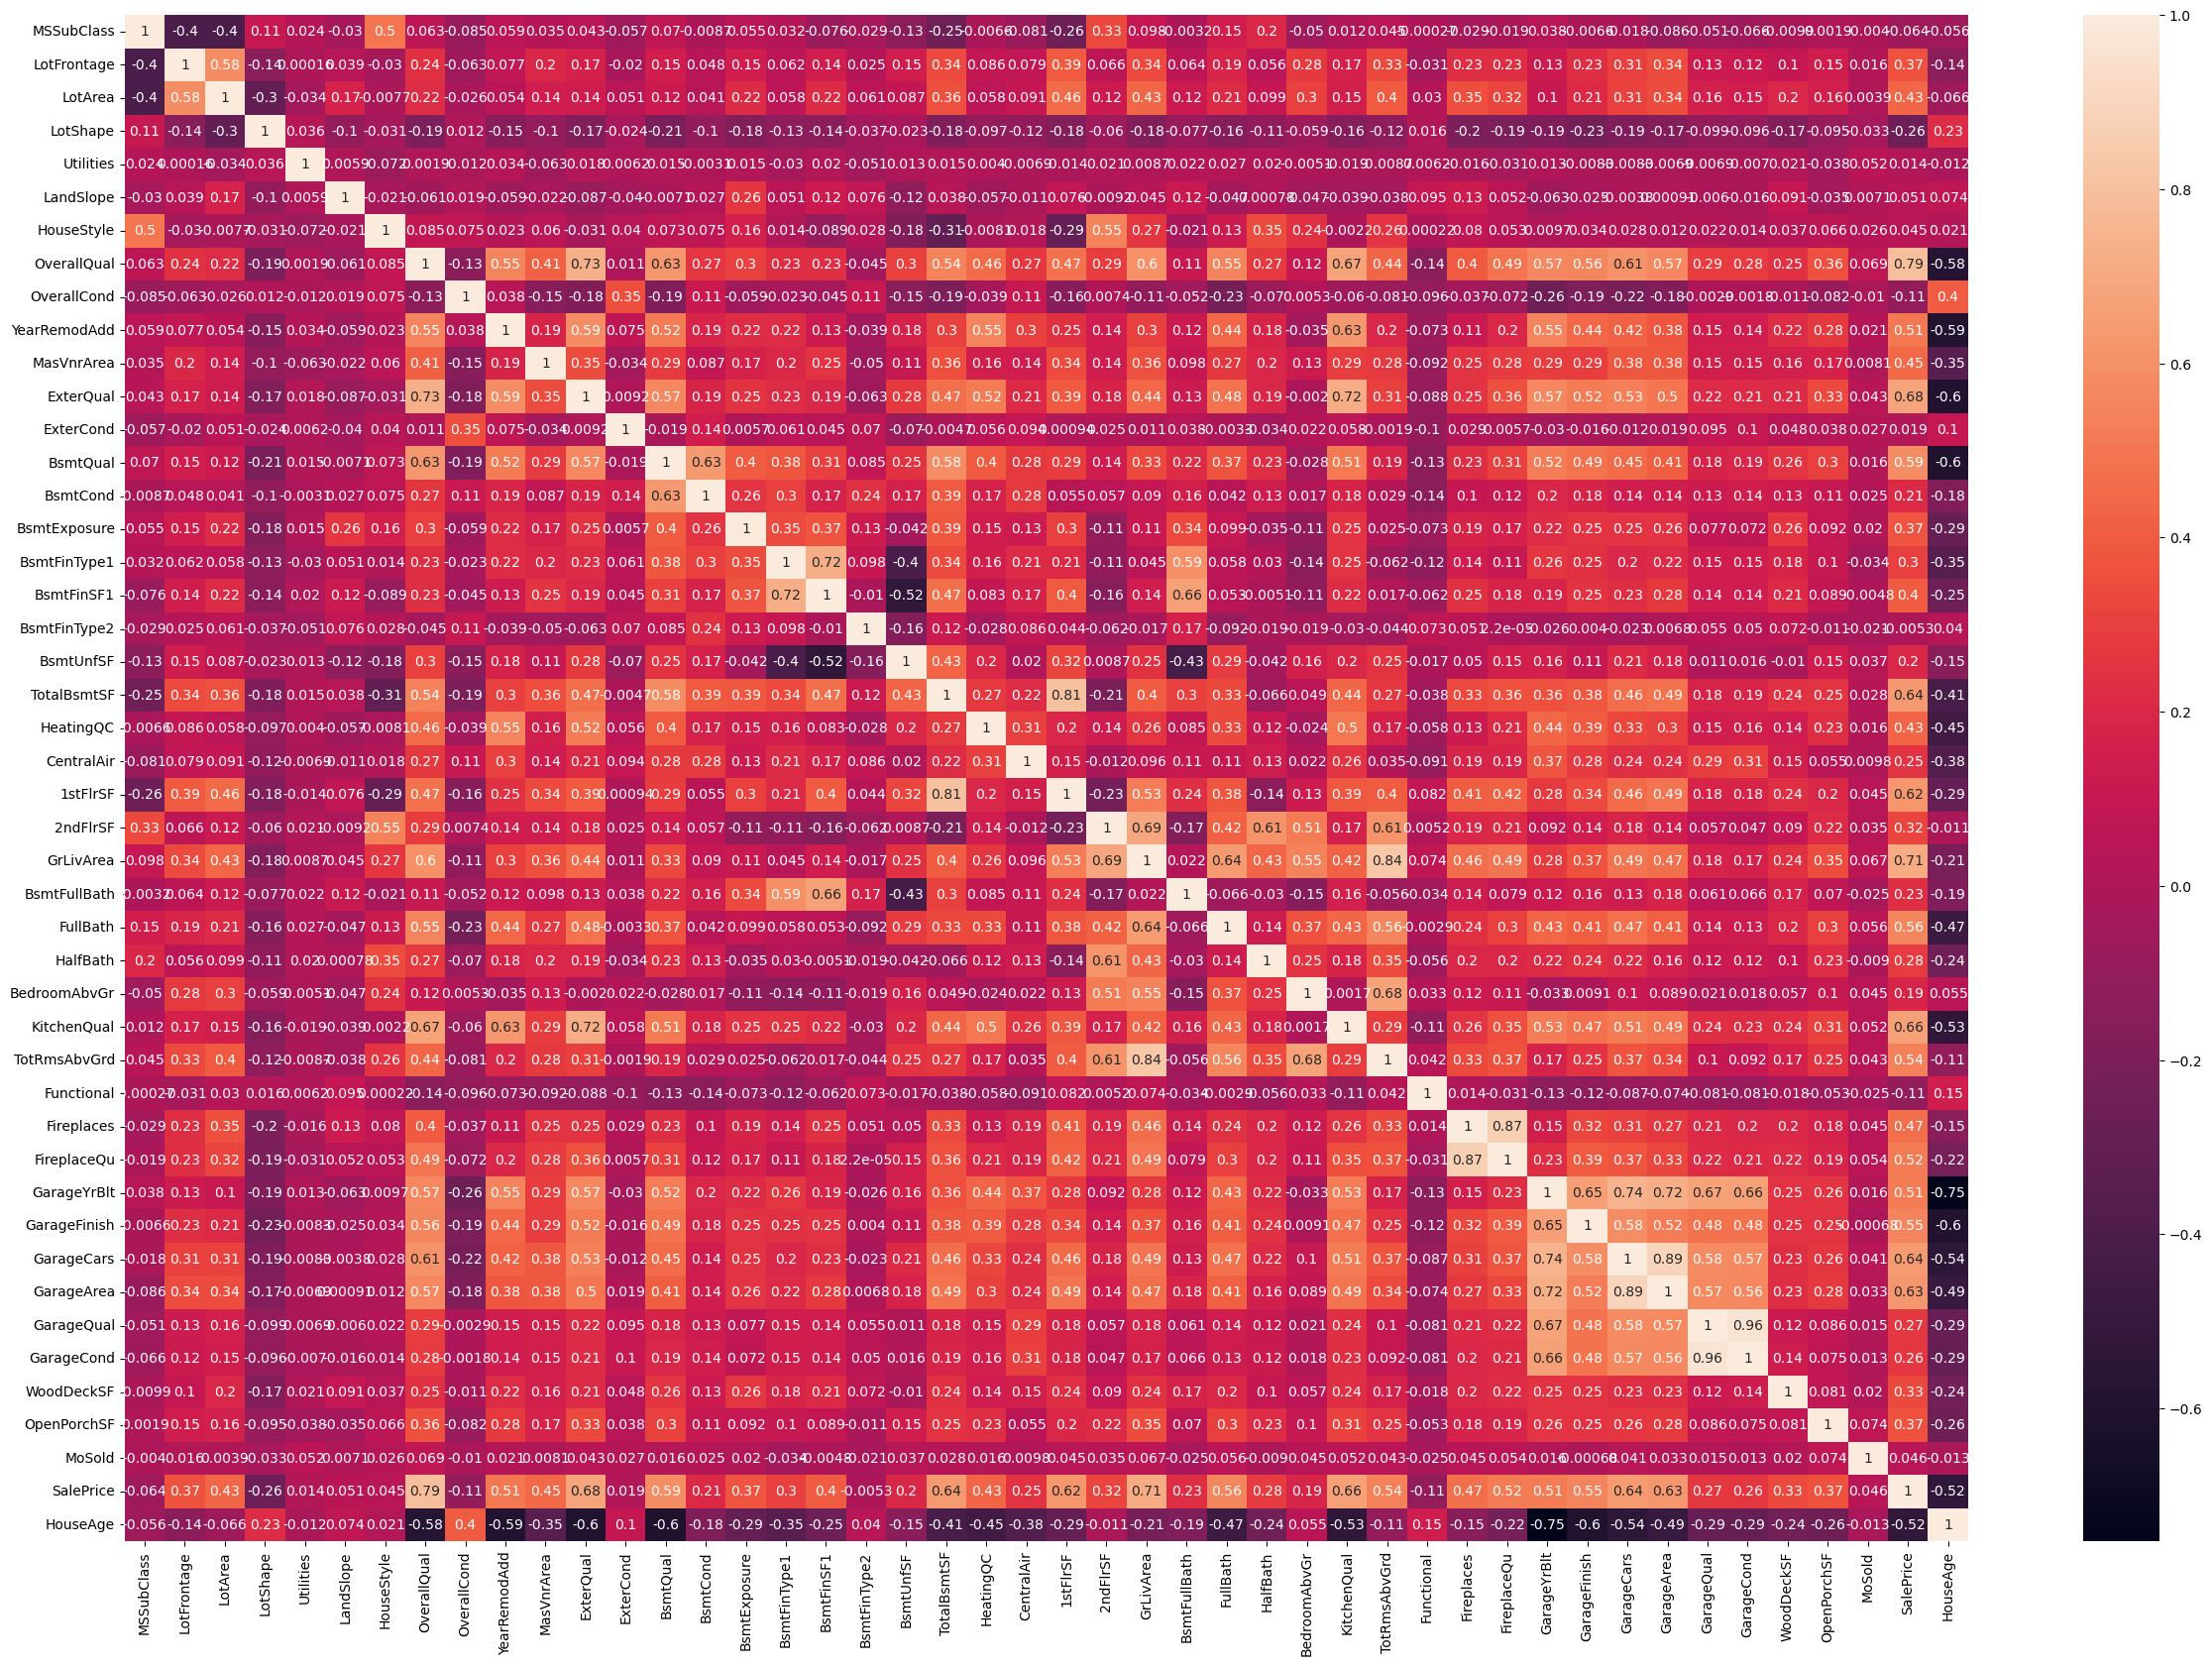

In [481]:
numerical_cols_df = housing_df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize = (30,20))
sns.heatmap(numerical_cols_df.corr(), annot = True)
plt.show()

<Figure size 2400x1200 with 0 Axes>

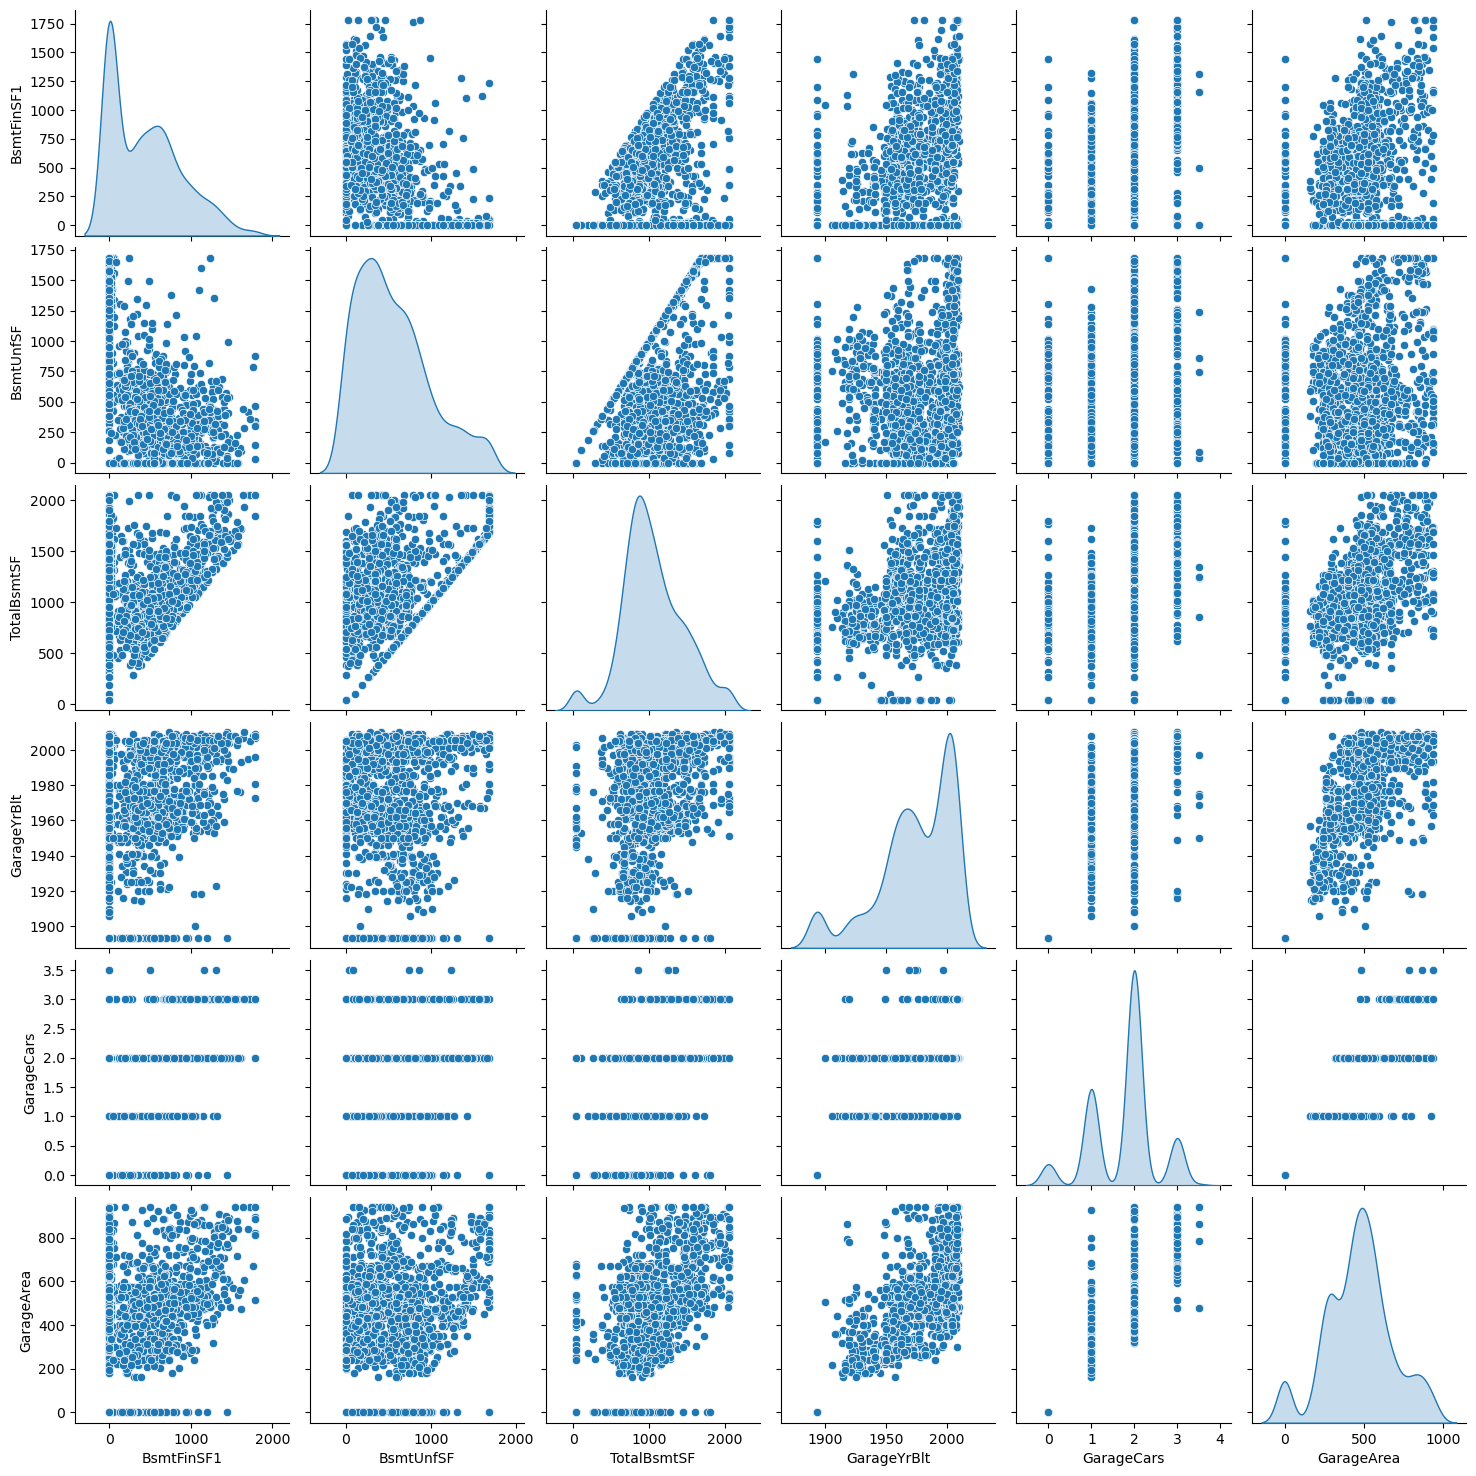

In [482]:
# Drawing pair plots for Basement and Garage features

garage_basement_cols = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'GarageArea']

plt.figure(figsize=(24,12))

sns.color_palette("mako", as_cmap=True)

sns.pairplot(data = housing_df, vars=garage_basement_cols, 
             diag_kind = 'kde')

plt.show()

<Figure size 2400x1200 with 0 Axes>

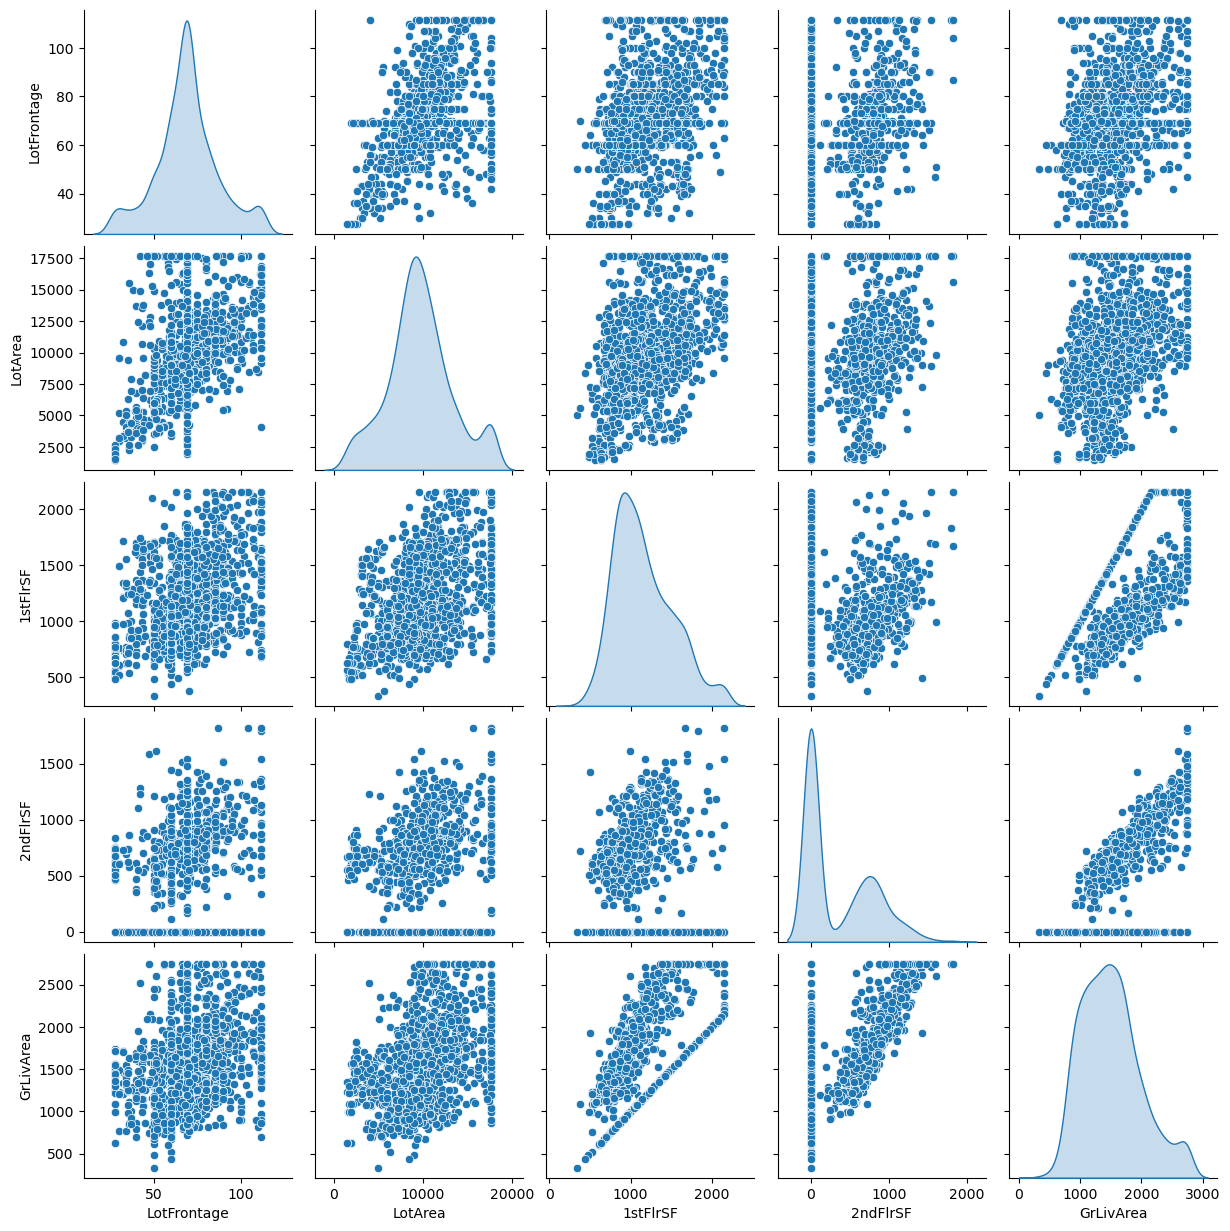

In [483]:
# Drawing pair plots for Lot and Builtup features


lot_floor_area_cols = ['LotFrontage', 'LotArea',  '1stFlrSF', '2ndFlrSF', 'GrLivArea']

plt.figure(figsize=(24,12))

sns.color_palette("mako", as_cmap=True)

sns.pairplot(data = housing_df, vars=lot_floor_area_cols, 
             diag_kind = 'kde')

plt.show()

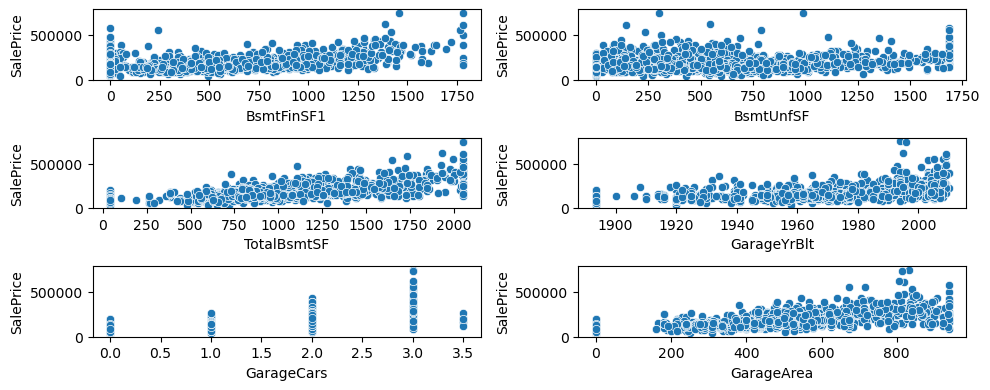

In [484]:
# Drawing scatter plots for Basement and Garage features vs SalePrice

fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(garage_basement_cols):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

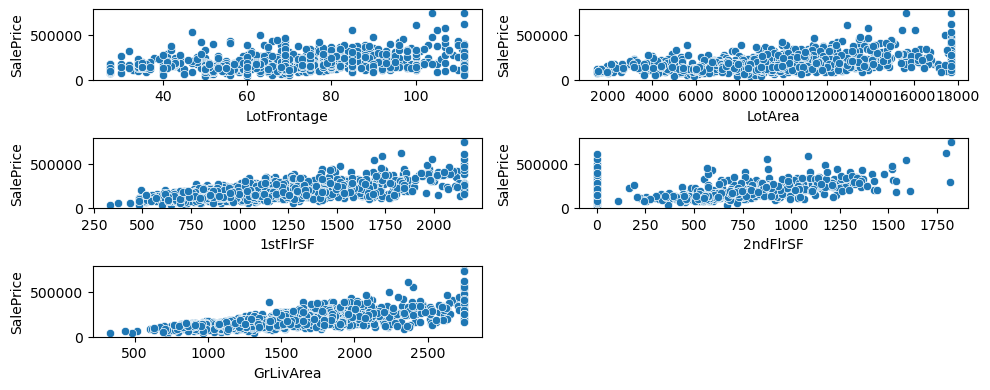

In [485]:
# Drawing scatter plots for Lot and Builtup features vs SalePrice

fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(lot_floor_area_cols):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

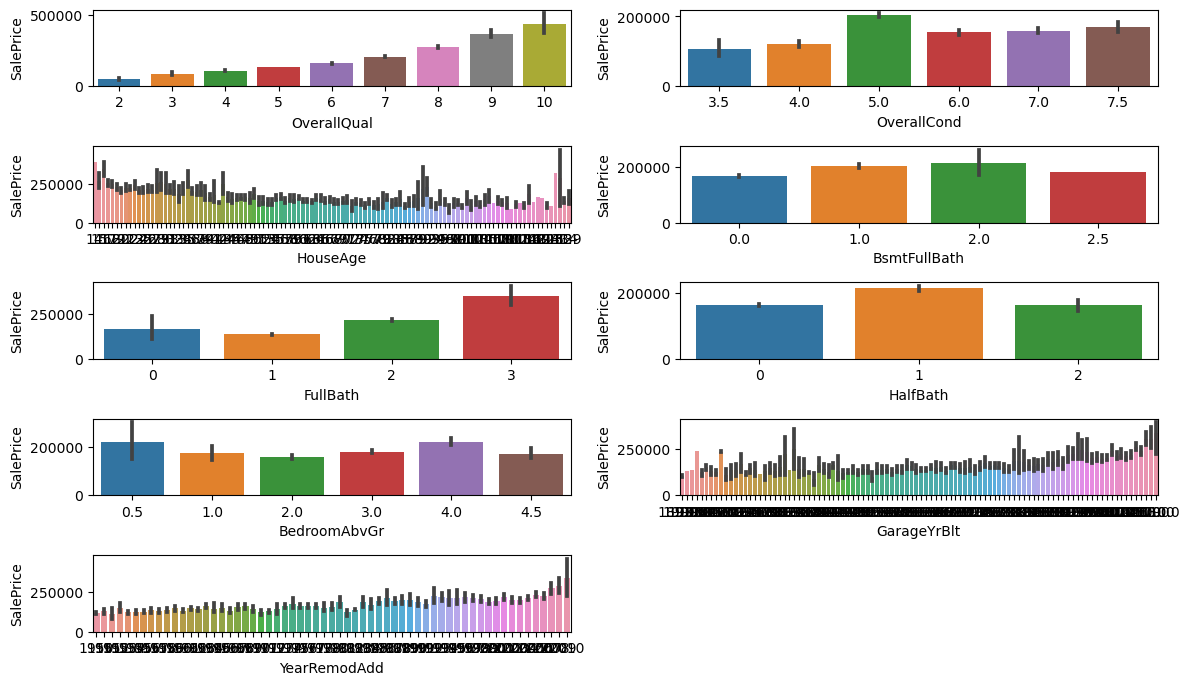

In [486]:
misc_cols = ['OverallQual','OverallCond','HouseAge','BsmtFullBath', 'FullBath','HalfBath',
             'BedroomAbvGr', 'GarageYrBlt','YearRemodAdd']
fig=plt.subplots(figsize=(12, 12))

for i, col in enumerate(misc_cols):
    plt.subplot(9, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing_df[col], y=housing_df['SalePrice'])
    plt.tight_layout()

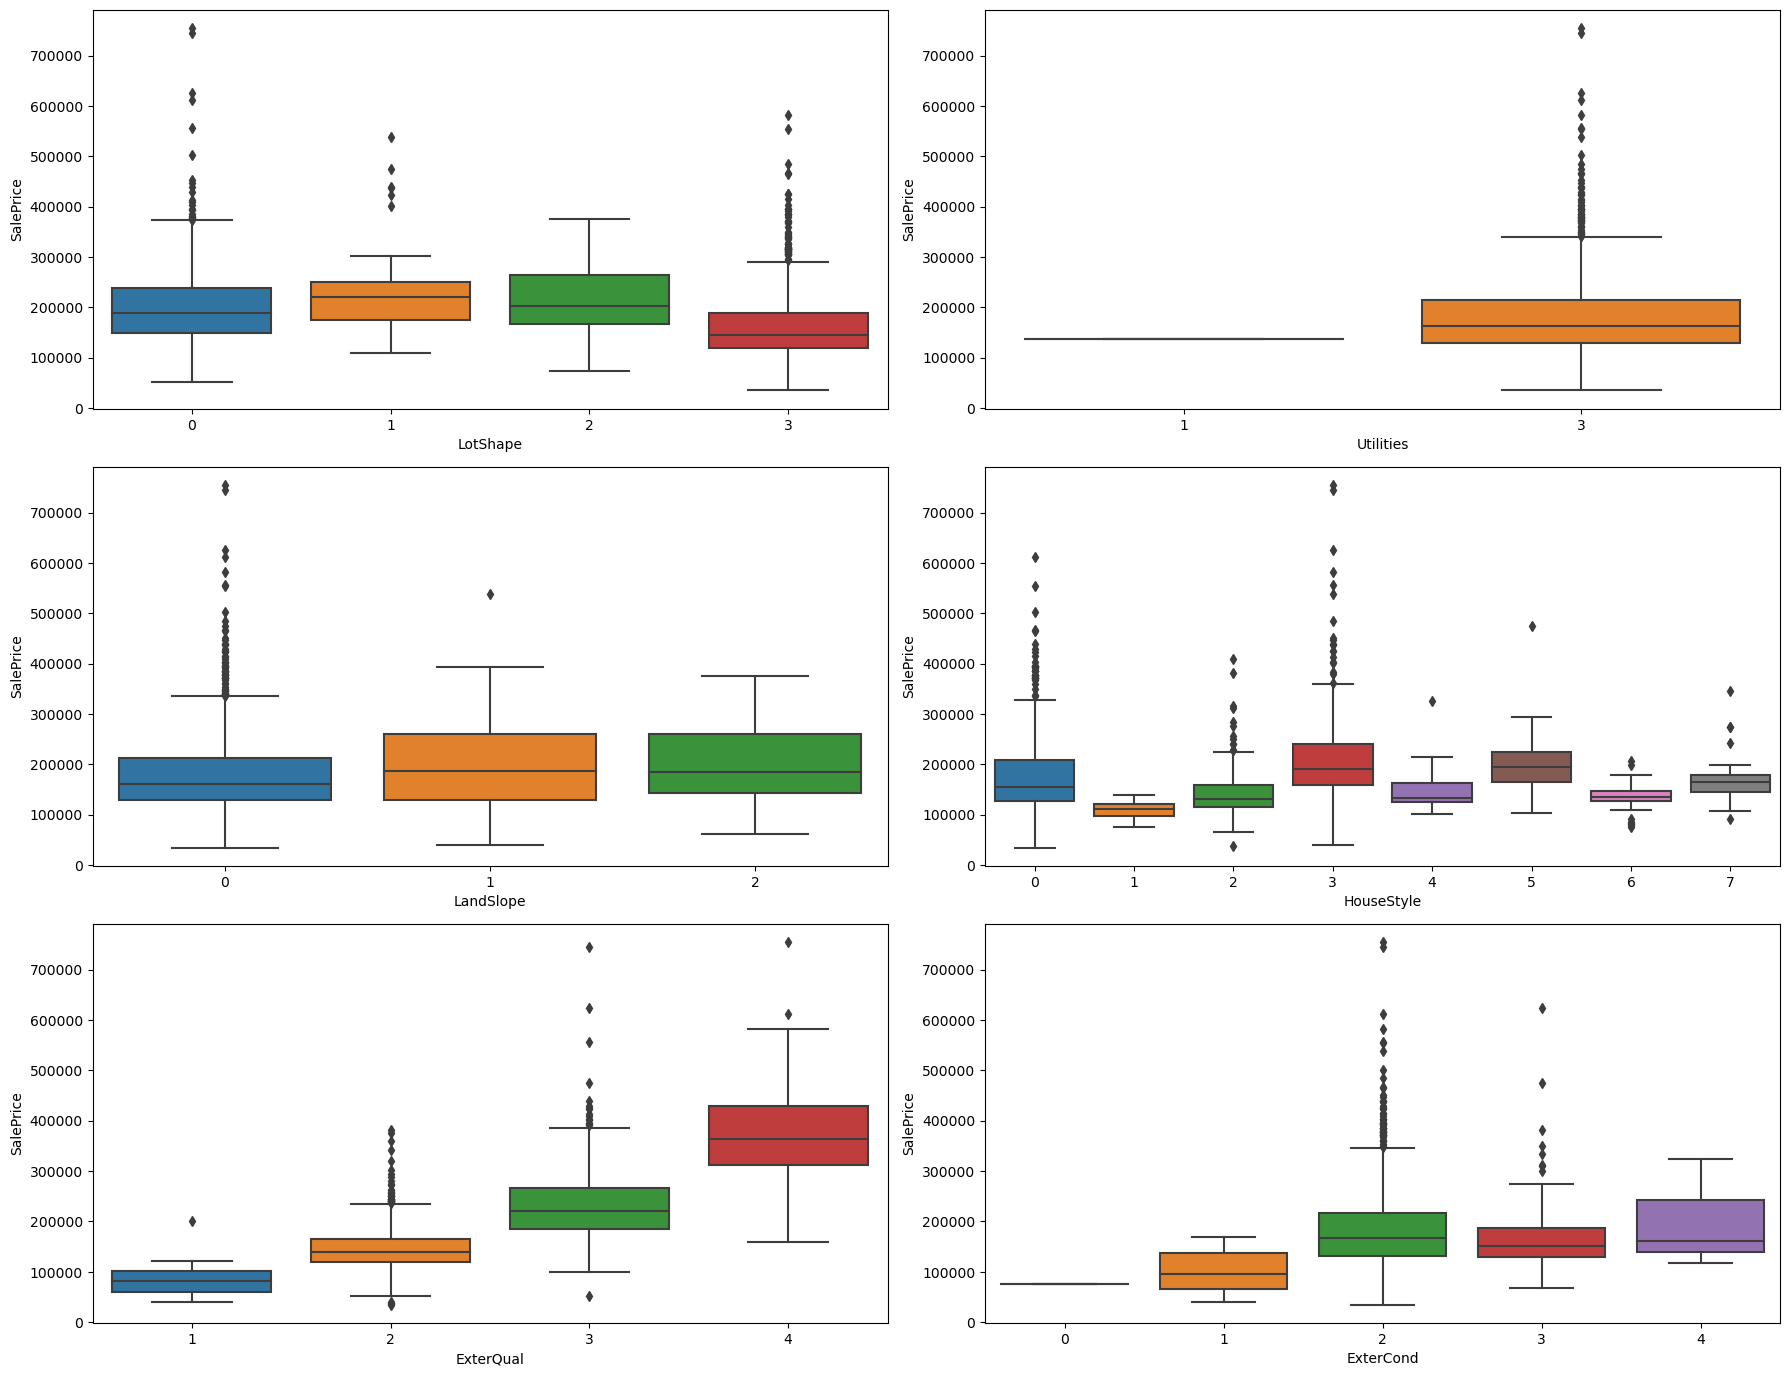

In [487]:
# Drawing plots for exterior features vs SalePrice

exterior_features_cols = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']
fig=plt.subplots(figsize=(18, 18))
for i, feature in enumerate(exterior_features_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=housing_df['SalePrice'], x=housing_df[feature])
    plt.tight_layout()

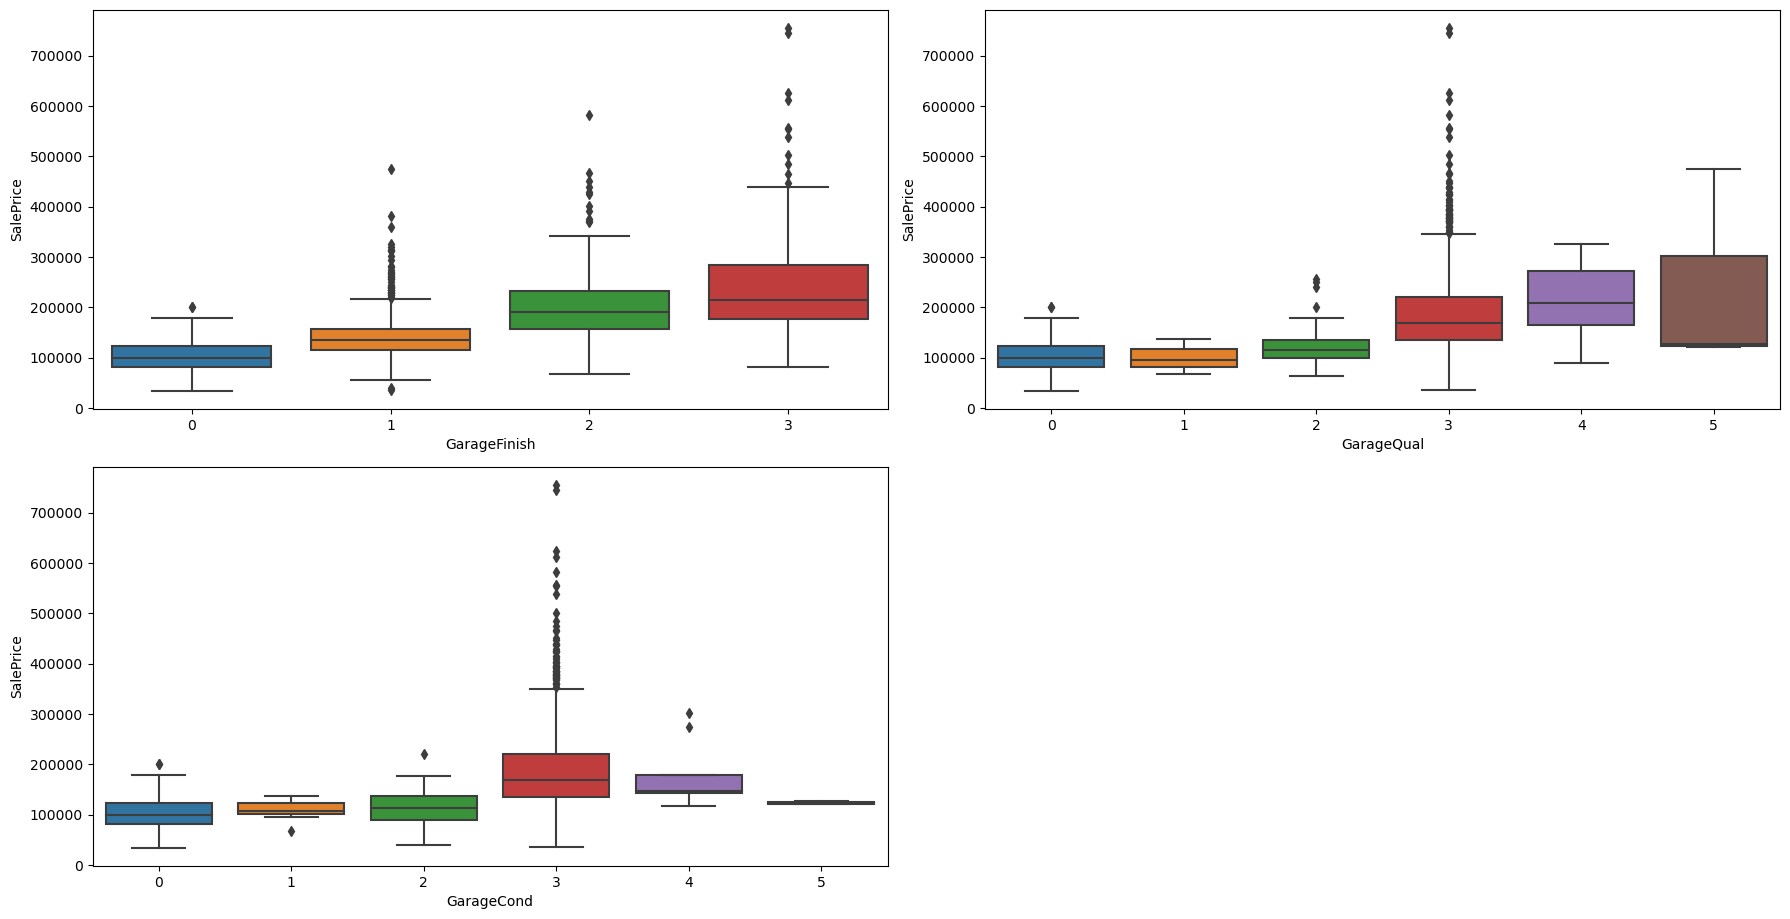

In [488]:
# Drawing plots for Garage features vs SalePrice

garage_featues_cols = ['GarageFinish', 'GarageQual','GarageCond']
fig=plt.subplots(figsize=(18, 18))
for i, feature in enumerate(garage_featues_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=housing_df['SalePrice'], x=housing_df[feature])
    plt.tight_layout()

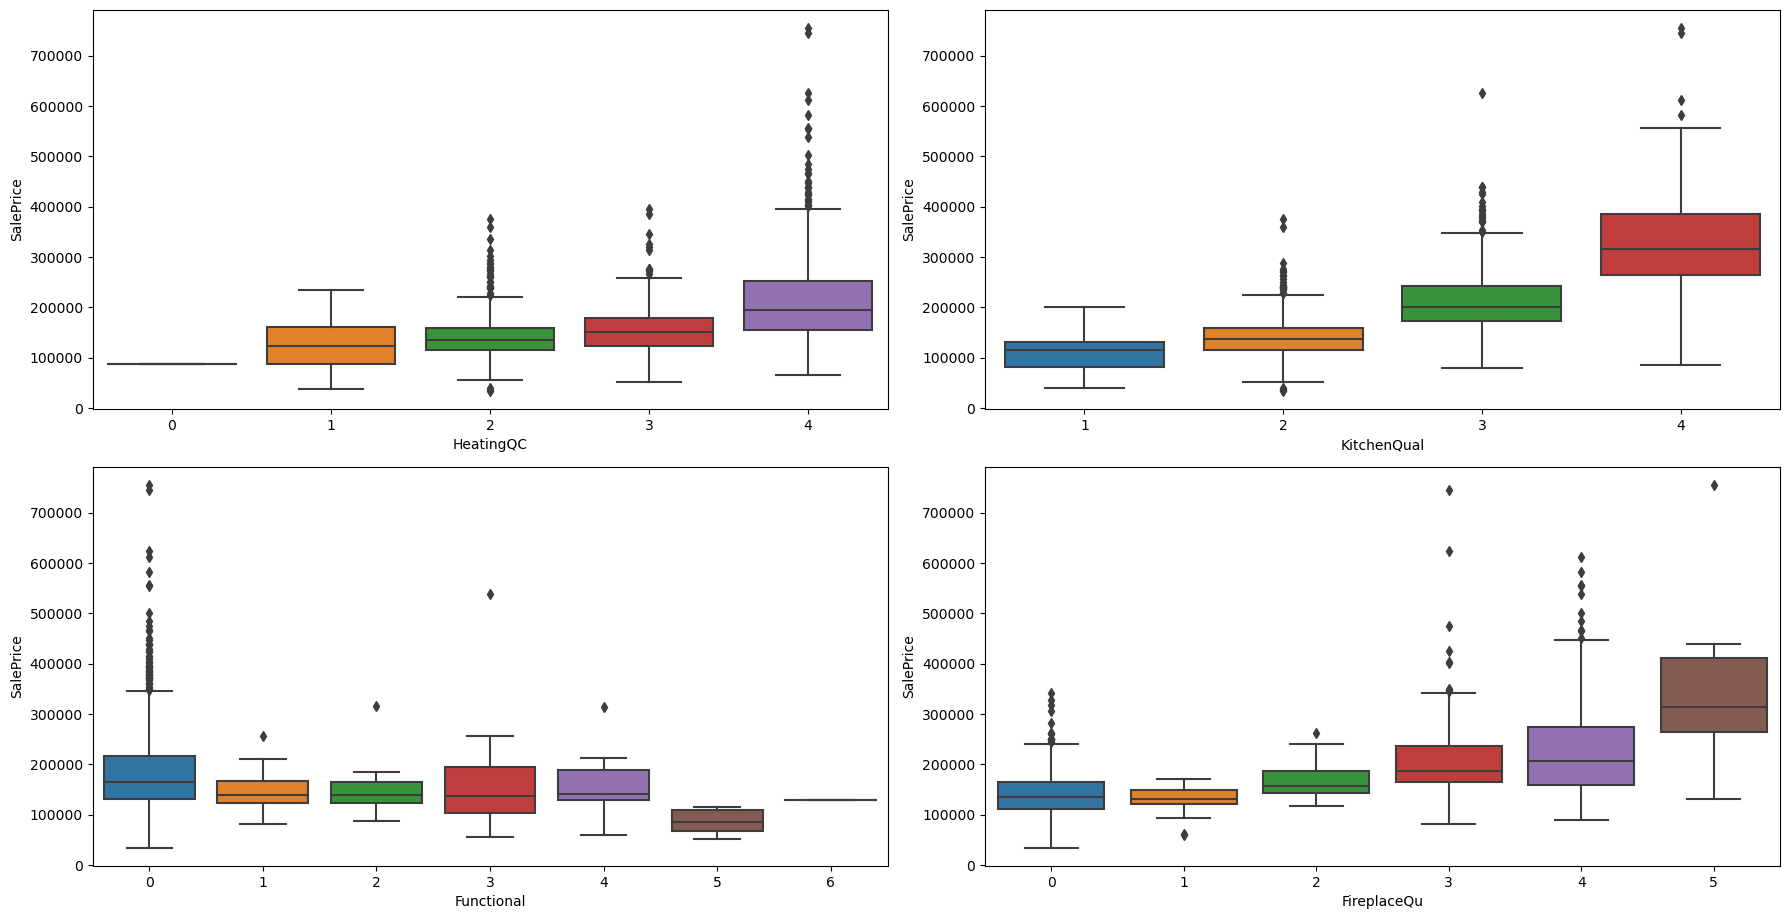

In [489]:
# Drawing plots for interior features vs SalePrice

interior_features_cols = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']
fig=plt.subplots(figsize=(18, 18))
for i, feature in enumerate(interior_features_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=housing_df['SalePrice'], x=housing_df[feature])
    plt.tight_layout()
    
    

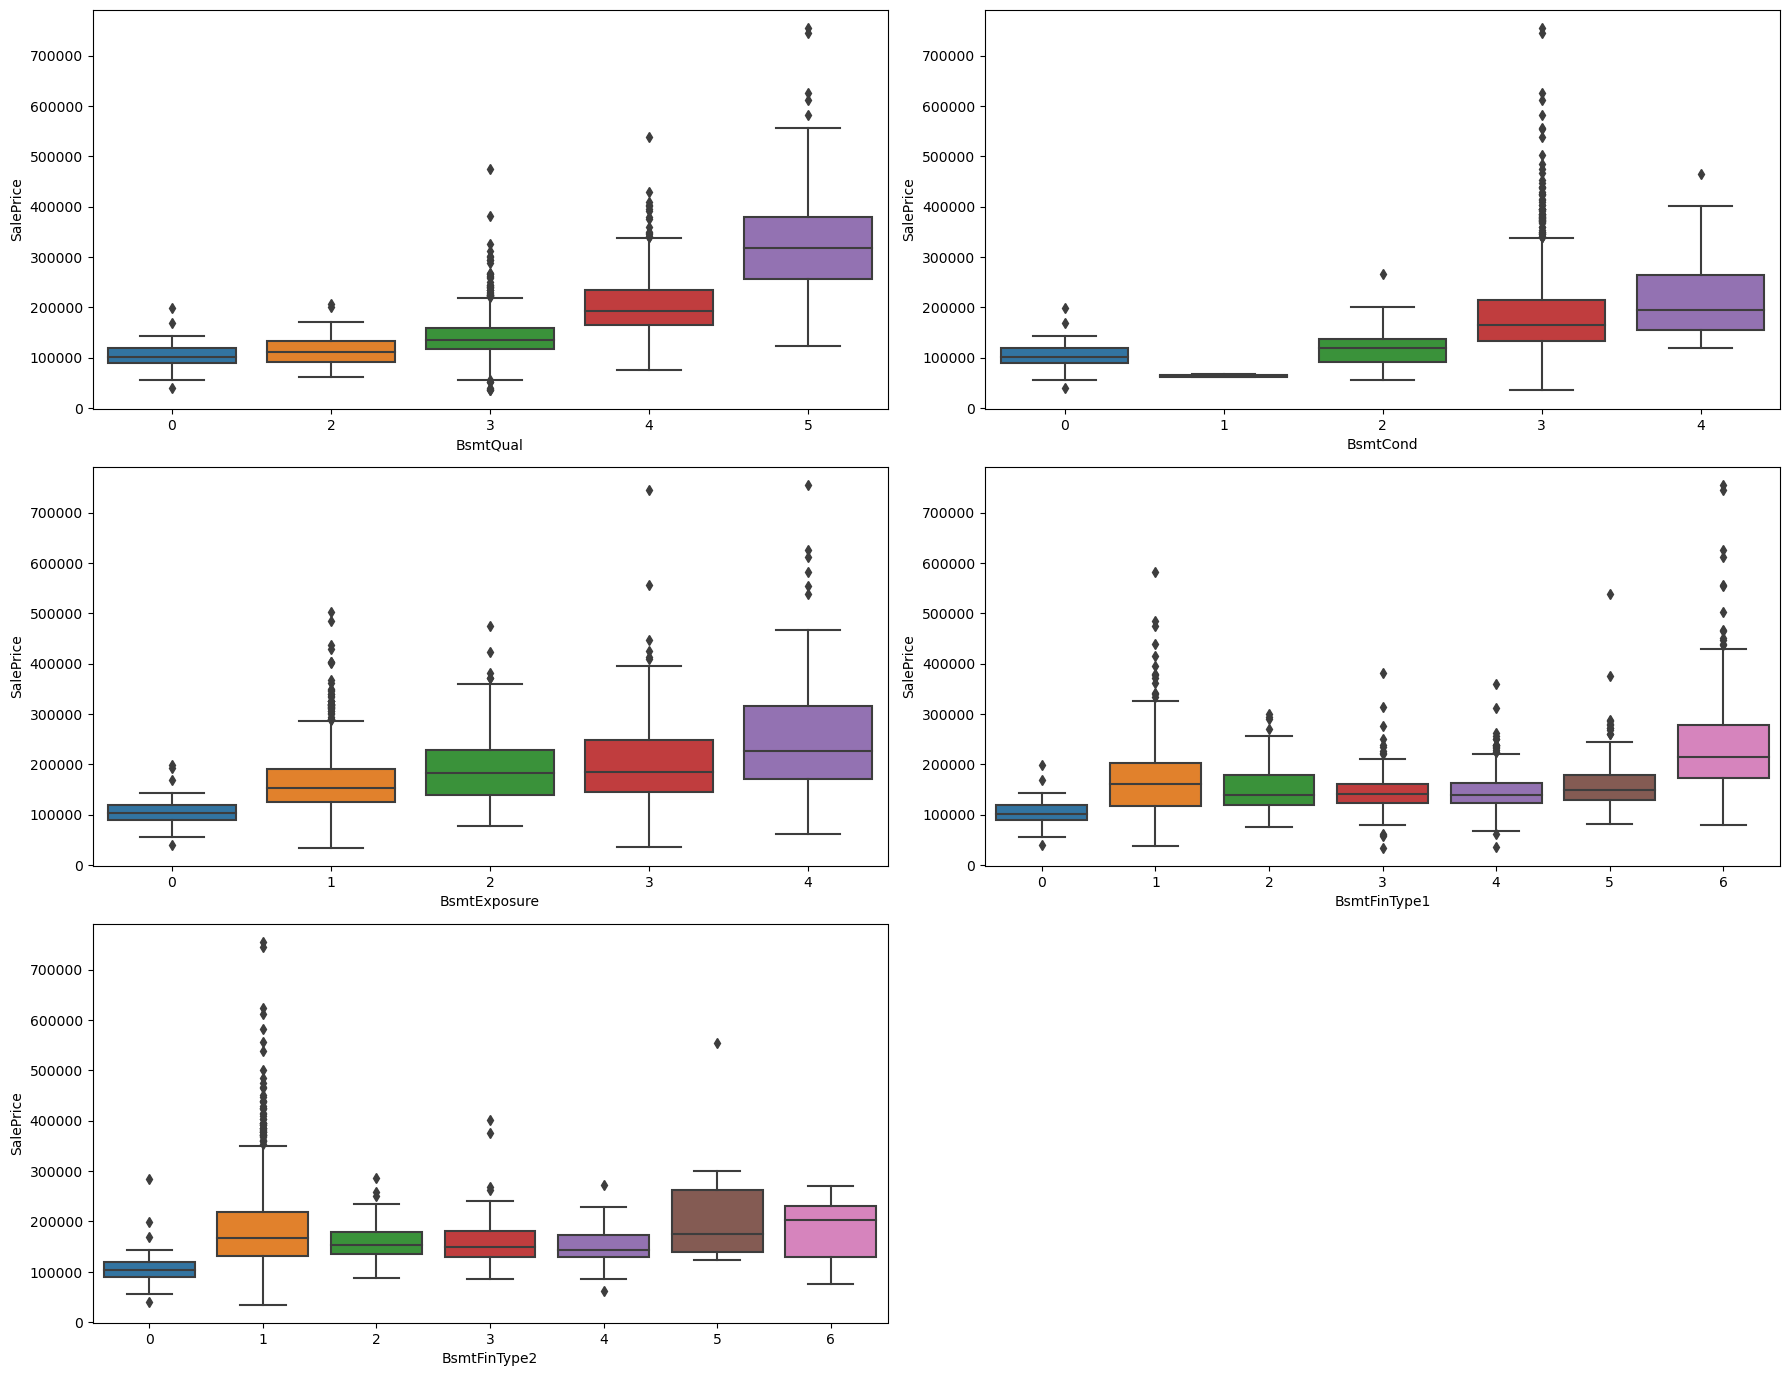

In [490]:
# Drawing plots for basement features vs SalePrice

bsmt_features_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
fig=plt.subplots(figsize=(18, 18))
for i, feature in enumerate(bsmt_features_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=housing_df['SalePrice'], x=housing_df[feature])
    plt.tight_layout()

### Data preparation for Model building

In [491]:
## Convert three columns to 'object' type

housing_df[['MSSubClass', 'OverallQual', 'OverallCond']] = housing_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [492]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

#### As per above output, there are 3 object type columns. We need to confirm that there are no non-numeric data, else model building will fail

In [493]:
housing_df.RoofMatl.value_counts()


RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [494]:
#RoofMatl has one value dominating the entire column. We can drop it as the other values will not have significant impact
housing_df.drop('RoofMatl', axis=1,inplace=True)

### Dummy variables

In [495]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [496]:
dummy_vars = housing_df.select_dtypes(include=['object']).columns
dummy_vars

Index(['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [497]:
cat_cols_df = housing_df.select_dtypes(include=['object'])
for col in cat_cols_df.columns:
    housing_df[col] = pd.to_numeric(housing_df[col],errors = 'coerce')

In [498]:
# Creating Dummy variables
dummy_vars_df = pd.get_dummies(housing_df[dummy_vars], drop_first=True)
dummy_vars_df.shape

(1460, 22)

In [499]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df, dummy_vars_df], axis=1)

# Dropping the categorical columns
housing_df = housing_df.drop(dummy_vars, axis=1)
housing_df.shape

(1460, 43)

### Linear Regression Model computation

#### First we will define some common methods for the computation of regression models.

In [500]:
def computeModel(X_param, y_param):
    X_train_sm = sm.add_constant(X_param)
    ols = sm.OLS(y_param, X_train_sm)
    lr_model = ols.fit()
    return lr_model

In [501]:
def calculateVIF (X_param):
    vif = pd.DataFrame()
    vif['Features'] = X_param.columns
    vif['VIF'] = [variance_inflation_factor(X_param.values, i) for i in range(X_param.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [502]:
### Creating training and test datasets
housing_training_set, housing_testing_set = train_test_split(housing_df, train_size=0.7, random_state = 100)

In [503]:
housing_df

LotFrontage  LotArea  LotShape  Utilities  LandSlope  HouseStyle  \
0            65.0   8450.0         3          3          0           3   
1            80.0   9600.0         3          3          0           0   
2            68.0  11250.0         0          3          0           3   
3            60.0   9550.0         0          3          0           3   
4            84.0  14260.0         0          3          0           3   
...           ...      ...       ...        ...        ...         ...   
1455         62.0   7917.0         3          3          0           3   
1456         85.0  13175.0         3          3          0           0   
1457         66.0   9042.0         3          3          0           3   
1458         68.0   9717.0         3          3          0           0   
1459         75.0   9937.0         3          3          0           0   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  GarageFinish  \
0             2003       196.0          3          2  ...             2   
1             1976         0.0          2          2  ...             2   
2             2002       162.0          3          2  ...             2   
3             1970         0.0          2          2  ...             1   
4             2000       350.0          3          2  ...             2   
...            ...         ...        ...        ...  ...           ...   
1455          2000         0.0          2          2  ...             2   
1456          1988       119.0          2          2  ...             1   
1457          2006         0.0          4          3  ...             2   
1458          1996         0.0          2          2  ...             1   
1459          1965         0.0          3          2  ...             3   

      GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0            2.0       548.0           3           3           0           61   
1            2.0       460.0           3           3         298            0   
2            2.0       608.0           3           3           0           42   
3            3.0       642.0           3           3           0           35   
4            3.0       836.0           3           3         192           84   
...          ...         ...         ...         ...         ...          ...   
1455         2.0       460.0           3           3           0           40   
1456         2.0       500.0           3           3         349            0   
1457         1.0       252.0           3           3           0           60   
1458         1.0       240.0           3           3         366            0   
1459         1.0       276.0           3           3         420           68   

      MoSold  SalePrice  HouseAge  
0          2     208500        21  
1          5     181500        48  
2          9     223500        23  
3          2     140000       109  
4         12     250000        24  
...      ...        ...       ...  
1455       8     175000        25  
1456       2     210000        46  
1457       5     266500        83  
1458       4     142125        74  
1459       6     147500        59  

[1460 rows x 43 columns]

In [504]:
# Rescaling values (only in training set)

scaler = StandardScaler()

numeric_cols_df = housing_training_set.select_dtypes(include=['int64', 'float64'])

#scale data
housing_training_set[numeric_cols_df.columns] = scaler.fit_transform(housing_training_set[numeric_cols_df.columns])
housing_training_set.describe()

LotFrontage       LotArea      LotShape     Utilities     LandSlope  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   2.835908e-16 -1.948599e-16  1.061291e-16  3.479641e-16 -1.913803e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.289888e+00 -2.269593e+00 -1.388661e+00 -3.193744e+01 -2.284708e-01   
25%   -4.874563e-01 -6.040971e-01 -1.388661e+00  3.131121e-02 -2.284708e-01   
50%    1.167853e-02 -3.027901e-02  7.487604e-01  3.131121e-02 -2.284708e-01   
75%    5.108134e-01  5.298635e-01  7.487604e-01  3.131121e-02 -2.284708e-01   
max    2.368704e+00  2.249504e+00  7.487604e-01  3.131121e-02  6.840278e+00   

         HouseStyle  YearRemodAdd    MasVnrArea     ExterQual     ExterCond  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -3.131677e-17 -8.420732e-16  6.437336e-17  1.243972e-16  3.618827e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -8.545612e-01 -1.698692e+00 -6.615534e-01 -2.450888e+00 -3.124189e+00   
25%   -8.545612e-01 -8.732432e-01 -6.615534e-01 -6.997636e-01 -2.608165e-01   
50%   -3.431269e-01  4.377630e-01 -6.615534e-01 -6.997636e-01 -2.608165e-01   
75%    6.797418e-01  9.233208e-01  5.055431e-01  1.051361e+00 -2.608165e-01   
max    2.725479e+00  1.214656e+00  2.403921e+00  2.802485e+00  5.465928e+00   

       ...  GarageFinish    GarageCars    GarageArea    GarageQual  \
count  ...  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   ...  2.783713e-17 -7.481229e-17 -9.569013e-17  1.183078e-16   
std    ...  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min    ... -1.906507e+00 -2.393509e+00 -2.285234e+00 -3.899778e+00   
25%    ... -7.929238e-01 -1.040742e+00 -6.801168e-01  2.680587e-01   
50%    ...  3.206597e-01  3.120240e-01  4.948195e-02  2.680587e-01   
75%    ...  3.206597e-01  3.120240e-01  5.164252e-01  2.680587e-01   
max    ...  1.434243e+00  2.341174e+00  2.278406e+00  3.046617e+00   

         GarageCond    WoodDeckSF   OpenPorchSF        MoSold     SalePrice  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   1.322264e-16 -6.959282e-17 -1.043892e-17  5.567426e-17  1.278768e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -3.892555e+00 -7.788561e-01 -8.158214e-01 -1.925187e+00 -1.843009e+00   
25%    2.704673e-01 -7.788561e-01 -8.158214e-01 -8.331783e-01 -6.464602e-01   
50%    2.704673e-01 -7.788561e-01 -3.232409e-01 -1.051723e-01 -2.480322e-01   
75%    2.704673e-01  6.691781e-01  5.103569e-01  6.228338e-01  4.349873e-01   
max    3.045815e+00  2.841229e+00  2.404897e+00  2.078846e+00  7.265183e+00   

           HouseAge  
count  1.021000e+03  
mean  -8.003175e-17  
std    1.000490e+00  
min   -1.278382e+00  
25%   -9.476765e-01  
50%   -5.477206e-02  
75%    5.735681e-01  
max    2.855435e+00  

[8 rows x 43 columns]

In [505]:
# Creating y_train & X_train

y_train = housing_training_set.pop('SalePrice')
X_train = housing_training_set

### Applying RFE with 25 features


In [506]:
regressionModel = LinearRegression()
regressionModel.fit(X_train, y_train)
rfe = RFE(regressionModel, n_features_to_select = 25)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 17),
 ('Utilities', False, 11),
 ('LandSlope', False, 10),
 ('HouseStyle', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 12),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 16),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 8),
 ('BsmtUnfSF', False, 9),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 3),
 ('CentralAir', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 5),
 ('FullBath', False, 13),
 ('HalfBath', False, 14),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 15),
 ('Functional', True, 1),
 ('Fireplaces', False, 2),
 ('FireplaceQu', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageFinish', False, 4),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageCond', Tru

In [507]:
# Creating X_train for RFE

selected_cols = X_train.columns[rfe.support_]
X_train_tmp = X_train[selected_cols]
X_train_rfe = X_train[selected_cols]

In [508]:
lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())

vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     199.5
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:10   Log-Likelihood:                -533.02
No. Observations:                1021   AIC:                             1118.
Df Residuals:                     995   BIC:                             1246.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.827e-15      0.013   1.41e-13   

Features    VIF
14     GrLivArea  30.00
13      2ndFlrSF  22.09
12      1stFlrSF  20.15
22    GarageQual  14.73
23    GarageCond  14.09
19   GarageYrBlt   7.27
21    GarageArea   6.86
10   TotalBsmtSF   6.59
20    GarageCars   6.58
6       BsmtQual   4.38
24      HouseAge   3.82
5      ExterQual   2.92
16   KitchenQual   2.61
7       BsmtCond   2.56
3   YearRemodAdd   2.24
1        LotArea   1.92
2     HouseStyle   1.91
15  BedroomAbvGr   1.88
0    LotFrontage   1.69
8   BsmtExposure   1.66
18   FireplaceQu   1.63
11    CentralAir   1.50
9     BsmtFinSF1   1.48
4     MasVnrArea   1.39
17    Functional   1.10

In [509]:
X_train_tmp = X_train_tmp.drop(['GarageYrBlt'], axis=1)

lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.6
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:10   Log-Likelihood:                -533.89
No. Observations:                1021   AIC:                             1118.
Df Residuals:                     996   BIC:                             1241.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.266e-16      0.013   9.79e-15   

Features    VIF
14     GrLivArea  29.98
13      2ndFlrSF  22.08
12      1stFlrSF  20.13
22    GarageCond  14.04
21    GarageQual  14.04
19    GarageCars   6.57
10   TotalBsmtSF   6.56
20    GarageArea   6.32
6       BsmtQual   4.31
5      ExterQual   2.90
23      HouseAge   2.71
16   KitchenQual   2.61
7       BsmtCond   2.55
3   YearRemodAdd   2.14
1        LotArea   1.92
2     HouseStyle   1.91
15  BedroomAbvGr   1.88
0    LotFrontage   1.67
8   BsmtExposure   1.66
18   FireplaceQu   1.61
11    CentralAir   1.49
9     BsmtFinSF1   1.46
4     MasVnrArea   1.39
17    Functional   1.10

In [510]:
X_train_tmp = X_train_tmp.drop(['GarageQual'], axis=1)

lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     216.8
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:10   Log-Likelihood:                -533.95
No. Observations:                1021   AIC:                             1116.
Df Residuals:                     997   BIC:                             1234.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.266e-16      0.013    9.8e-15   

Features    VIF
14     GrLivArea  29.95
13      2ndFlrSF  22.06
12      1stFlrSF  20.13
19    GarageCars   6.56
10   TotalBsmtSF   6.56
20    GarageArea   6.30
6       BsmtQual   4.30
5      ExterQual   2.90
22      HouseAge   2.71
16   KitchenQual   2.61
7       BsmtCond   2.55
3   YearRemodAdd   2.14
1        LotArea   1.92
2     HouseStyle   1.91
15  BedroomAbvGr   1.88
21    GarageCond   1.83
0    LotFrontage   1.67
8   BsmtExposure   1.66
18   FireplaceQu   1.60
11    CentralAir   1.49
9     BsmtFinSF1   1.46
4     MasVnrArea   1.39
17    Functional   1.09

In [511]:
X_train_tmp = X_train_tmp.drop(['GarageCars'], axis=1)

lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     226.4
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:11   Log-Likelihood:                -534.82
No. Observations:                1021   AIC:                             1116.
Df Residuals:                     998   BIC:                             1229.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.266e-16      0.013   9.79e-15   

Features    VIF
14     GrLivArea  29.95
13      2ndFlrSF  22.03
12      1stFlrSF  20.12
10   TotalBsmtSF   6.56
6       BsmtQual   4.27
5      ExterQual   2.90
21      HouseAge   2.65
19    GarageArea   2.65
16   KitchenQual   2.61
7       BsmtCond   2.54
3   YearRemodAdd   2.14
1        LotArea   1.92
2     HouseStyle   1.91
15  BedroomAbvGr   1.88
20    GarageCond   1.72
0    LotFrontage   1.67
8   BsmtExposure   1.65
18   FireplaceQu   1.58
11    CentralAir   1.48
9     BsmtFinSF1   1.44
4     MasVnrArea   1.38
17    Functional   1.09

In [512]:
X_train_tmp = X_train_tmp.drop(['GarageCond'], axis=1)

lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     237.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:11   Log-Likelihood:                -535.50
No. Observations:                1021   AIC:                             1115.
Df Residuals:                     999   BIC:                             1223.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.266e-16      0.013   9.79e-15   

Features    VIF
14     GrLivArea  29.93
13      2ndFlrSF  22.03
12      1stFlrSF  20.11
10   TotalBsmtSF   6.51
6       BsmtQual   4.27
5      ExterQual   2.90
20      HouseAge   2.64
16   KitchenQual   2.61
7       BsmtCond   2.51
3   YearRemodAdd   2.10
1        LotArea   1.92
2     HouseStyle   1.91
19    GarageArea   1.91
15  BedroomAbvGr   1.88
0    LotFrontage   1.66
8   BsmtExposure   1.64
18   FireplaceQu   1.58
9     BsmtFinSF1   1.44
11    CentralAir   1.41
4     MasVnrArea   1.38
17    Functional   1.09

In [513]:
X_train_tmp = X_train_tmp.drop(['CentralAir'], axis=1)

lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.6
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:11   Log-Likelihood:                -536.48
No. Observations:                1021   AIC:                             1115.
Df Residuals:                    1000   BIC:                             1218.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.266e-16      0.013   9.79e-15   

Features    VIF
13     GrLivArea  29.88
12      2ndFlrSF  22.03
11      1stFlrSF  20.09
10   TotalBsmtSF   6.50
6       BsmtQual   4.21
5      ExterQual   2.87
15   KitchenQual   2.59
19      HouseAge   2.45
7       BsmtCond   2.31
3   YearRemodAdd   2.06
1        LotArea   1.91
2     HouseStyle   1.90
18    GarageArea   1.90
14  BedroomAbvGr   1.88
0    LotFrontage   1.66
8   BsmtExposure   1.63
17   FireplaceQu   1.56
9     BsmtFinSF1   1.43
4     MasVnrArea   1.38
16    Functional   1.09

In [514]:
X_train_tmp = X_train_tmp.drop(['MasVnrArea'], axis=1)

lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     260.8
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:11   Log-Likelihood:                -538.26
No. Observations:                1021   AIC:                             1117.
Df Residuals:                    1001   BIC:                             1215.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.266e-16      0.013   9.77e-15   

Features    VIF
12     GrLivArea  29.85
11      2ndFlrSF  21.94
10      1stFlrSF  20.03
9    TotalBsmtSF   6.44
5       BsmtQual   4.21
4      ExterQual   2.86
14   KitchenQual   2.59
18      HouseAge   2.40
6       BsmtCond   2.30
3   YearRemodAdd   2.04
2     HouseStyle   1.89
1        LotArea   1.88
17    GarageArea   1.88
13  BedroomAbvGr   1.87
0    LotFrontage   1.65
7   BsmtExposure   1.63
16   FireplaceQu   1.55
8     BsmtFinSF1   1.42
15    Functional   1.09

In [515]:
X_train_tmp = X_train_tmp.drop(['GrLivArea'], axis=1)

lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.7
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:11   Log-Likelihood:                -542.75
No. Observations:                1021   AIC:                             1124.
Df Residuals:                    1002   BIC:                             1217.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.266e-16      0.013   9.74e-15   

Features   VIF
9    TotalBsmtSF  6.44
10      1stFlrSF  5.16
5       BsmtQual  4.20
4      ExterQual  2.85
11      2ndFlrSF  2.69
13   KitchenQual  2.59
17      HouseAge  2.39
6       BsmtCond  2.30
3   YearRemodAdd  2.04
1        LotArea  1.88
16    GarageArea  1.88
2     HouseStyle  1.87
12  BedroomAbvGr  1.84
0    LotFrontage  1.65
7   BsmtExposure  1.62
15   FireplaceQu  1.53
8     BsmtFinSF1  1.42
14    Functional  1.08

In [516]:
X_train_tmp = X_train_tmp.drop(['TotalBsmtSF'], axis=1)

lr_model = computeModel(X_train_tmp, y_train)
print(lr_model.summary())
vif = calculateVIF(X_train_tmp)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     285.8
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:12   Log-Likelihood:                -547.45
No. Observations:                1021   AIC:                             1131.
Df Residuals:                    1003   BIC:                             1220.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.266e-16      0.013    9.7e-15   

Features   VIF
5       BsmtQual  3.70
9       1stFlrSF  2.85
4      ExterQual  2.82
10      2ndFlrSF  2.68
12   KitchenQual  2.59
16      HouseAge  2.39
6       BsmtCond  2.09
3   YearRemodAdd  2.02
15    GarageArea  1.88
1        LotArea  1.88
11  BedroomAbvGr  1.83
2     HouseStyle  1.73
0    LotFrontage  1.65
7   BsmtExposure  1.60
14   FireplaceQu  1.53
8     BsmtFinSF1  1.38
13    Functional  1.08

##### Observation
1. R-squared score is pretty high: 0.829
2. Adjusted R-squared score is pretty high: 0.826
3. F-statistic score is good : 285.8
4. Prob (F-statistic) is zero
5. All p-values are smaller than 0.05
6. All predictors have VIF < 5

##### This model seems to be significant. We will do Residual analysis and other predictions using this model.

### Residual Analysis


In [517]:
# Adding coefficient to X_train_tmp

X_train_sm = sm.add_constant(X_train_tmp)

y_train_pred = lr_model.predict(X_train_sm)

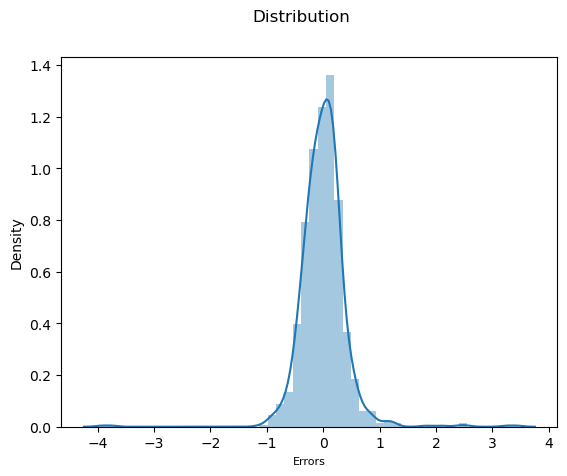

In [518]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Distribution', fontsize = 12)
plt.xlabel('Errors', fontsize = 8)
plt.show()

##### Observation
1. Errors are normally distributed.
2. Distribution is centered around 0.

###  Predicting output


In [519]:
# Scaling test data

housing_test_tmp = housing_testing_set.copy(deep= True)

housing_test_tmp[numeric_cols_df.columns] = scaler.transform(housing_test_tmp[numeric_cols_df.columns])

# Creating y_test and X_test
y_test = housing_test_tmp.pop('SalePrice')
X_test = housing_test_tmp
X_test_rfe = X_test[selected_cols]

In [520]:
X_test = X_test[X_train_tmp.columns]
X_test.head()

LotFrontage   LotArea  HouseStyle  YearRemodAdd  ExterQual  BsmtQual  \
1436    -0.487456 -0.171222   -0.854561     -0.679020  -0.699764 -0.533302   
57       1.120867  0.566983    0.679742      0.923321   1.051361  0.577925   
780     -0.321078 -0.485203   -0.854561      0.534875  -0.699764  0.577925   
382      0.566273 -0.102844    0.679742      1.020432   1.051361  0.577925   
1170     0.399895  0.074381    2.725479     -0.387685  -0.699764 -0.533302   

      BsmtCond  BsmtExposure  BsmtFinSF1  1stFlrSF  2ndFlrSF  BedroomAbvGr  \
1436  0.123940     -0.607084    0.397206 -0.810048 -0.790485      0.209295   
57    0.123940     -0.607084   -1.021034 -0.820933  1.190046      0.209295   
780   1.857399     -0.607084   -1.021034  0.248436 -0.790485      0.209295   
382   0.123940      1.226741   -1.021034 -0.605970  1.185440      0.209295   
1170  0.123940      1.226741    0.180786 -0.118904 -0.790485      0.209295   

      KitchenQual  Functional  FireplaceQu  GarageArea  HouseAge  
1436    -0.776063   -0.230106    -0.985354    0.282954  0.011369  
57       0.741868   -0.230106    -0.985354    0.462921 -1.079959  
780     -0.776063   -0.230106     0.658513   -0.329909 -0.782324  
382      0.741868   -0.230106    -0.985354    0.822857 -1.146100  
1170    -0.776063   -0.230106    -0.437399   -0.543925 -0.187054

In [521]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

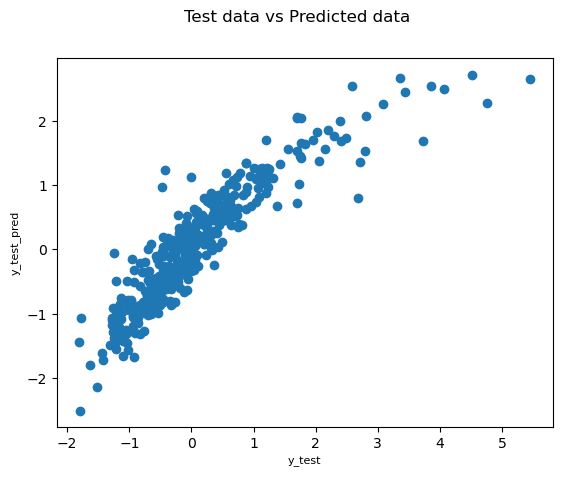

In [522]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test data vs Predicted data', fontsize = 12)
plt.xlabel('y_test', fontsize = 8)
plt.ylabel('y_test_pred', fontsize = 8)
plt.show()

##### Observation
Predicted values are distributed in a tight range. However, there are a few outliers as well.

### R-squared score


In [523]:
r2_score_test = r2_score(y_test, y_test_pred)
print(r2_score_test)

0.8231738476068401


##### Observation

R-squared score of 0.82 for test data is also high.

### Ridge Regression

In [524]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)     

model.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [525]:
print(model.best_params_)

{'alpha': 100}


In [526]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.0349807   0.07125696 -0.03142341  0.06012299  0.03617669  0.12441532
  0.08475456 -0.04965575  0.08140525  0.10429576  0.10069856  0.02245025
  0.15156975  0.20334136  0.14996793 -0.03764669  0.10484857 -0.06716365
  0.07235221 -0.01424857  0.05285131  0.05568095  0.00184305 -0.01950281
 -0.04844457]


In [527]:
# R2 score, RSS and RMSE
y_pred_ridge_train = ridge.predict(X_train_rfe)
y_pred_ridge_test = ridge.predict(X_test_rfe)

r2_train_ridge = r2_score(y_train, y_pred_ridge_train)
r2_test_ridge = r2_score(y_test, y_pred_ridge_test)


print('R2 score (training) : ',r2_train_ridge)
print('R2 score (test) : ', r2_test_ridge)


rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
print('RMSE (train) : ', rmse_train_ridge)
print('RMSE (test) : ', rmse_test_ridge)

R2 score (training) :  0.8272541444591541
R2 score (test) :  0.8234212590219565
RMSE (train) :  0.41562706305153646
RMSE (test) :  0.42642362646339727


### Lasso Regression


In [528]:
lasso = Lasso()

# cross validation
model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [529]:
# Printing the best hyperparameter alpha
print(model.best_params_)

{'alpha': 0.01}


In [530]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.01)

In [531]:
lasso.coef_

array([ 0.02711027,  0.06565905, -0.0218757 ,  0.05200438,  0.02543914,
        0.13711437,  0.0761176 , -0.03216561,  0.07836375,  0.10594083,
        0.09076345,  0.007498  ,  0.299328  ,  0.34637562,  0.        ,
       -0.03450638,  0.10584898, -0.06593771,  0.06600306, -0.        ,
        0.03811341,  0.0414946 , -0.        , -0.00189536, -0.04751746])

In [532]:
y_pred_lasso_train = lasso.predict(X_train_rfe)
y_pred_lasso_test = lasso.predict(X_test_rfe)
r2_train_lasso = r2_score(y_train, y_pred_lasso_train)
r2_test_lasso = r2_score(y_test, y_pred_lasso_test)


print('R2 score (training) : ',r2_train_lasso)
print('R2 score (test) : ', r2_test_lasso)


rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
print('RMSE (train) : ', rmse_train_lasso)
print('RMSE (test) : ', rmse_test_lasso)

R2 score (training) :  0.8298372889517476
R2 score (test) :  0.826539301493526
RMSE (train) :  0.4125078314992971
RMSE (test) :  0.42264194540991545


### Final Model

Lasso's R-2 score is slightly better hence Lasso is being preferred over Ridge

### Recommendations on Features

Top Features:-

1. BsmtQual, 1stFlrSF, ExterQual, 2ndFlrSF, KitchenQualHouseAge, BsmtCond, YearRemodAdd, GarageArea, LotArea, 	 BedroomAbvGr, HouseStyle, LotFrontage, BsmtExposure, FireplaceQu, BsmtFinSF1, Functional

2. Basement condition, its size and quality attracts customers and it affects housing price.

3. Garage area, Build quality, Ground Floor, First Floor built up areas are key features which are considered by buyers.

Besides, sales price is also affected by the availability of other features such as availability of fireplace, house style, etc.

Surprise Housing should consider these features/factors.